### EDA - sklearn wine dataset
Oct 17, 2019

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mns
import pandas_profiling as pp

from sklearn.datasets import load_wine

#### Load the sklearn wine dataset
Calling the load_wine will return a **BUNCH** type of data. A Bunch is python dictionary type data structure and it allows you to do attribute-style access. 

The wine dataset that we are using here belong to the sklearn toy datasets. These datasets are typically used by beginners trying to learn Machine Learning (just like me.). Note that you still need to convert the data into a a pandas dataframe.

In [3]:
wine_raw = load_wine()

In [4]:
wine_raw.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(wine_raw.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [6]:
print(wine_raw.target_names)

['class_0' 'class_1' 'class_2']


In [7]:
print(wine_raw.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### Converting to Pandas DataFrame

In [8]:
wine = pd.DataFrame(data=wine_raw.data, columns=wine_raw.feature_names)

In [10]:
wine['target'] = wine_raw.target

In [16]:
wine['class'] = wine['target'].apply(lambda x: wine_raw.target_names[x])

In [17]:
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target    class  
0                          3.92   1065.0       0  class_0  
1                          3.40   1050.0       0  class_0  
2                          3.17   1185.0       0  class_0  
3                          3.45   1480.0       0  class_0  
4                          2.93    735.0       0  class_0

### Exploratory Data Analysis

In [19]:
pp.ProfileReport(wine)

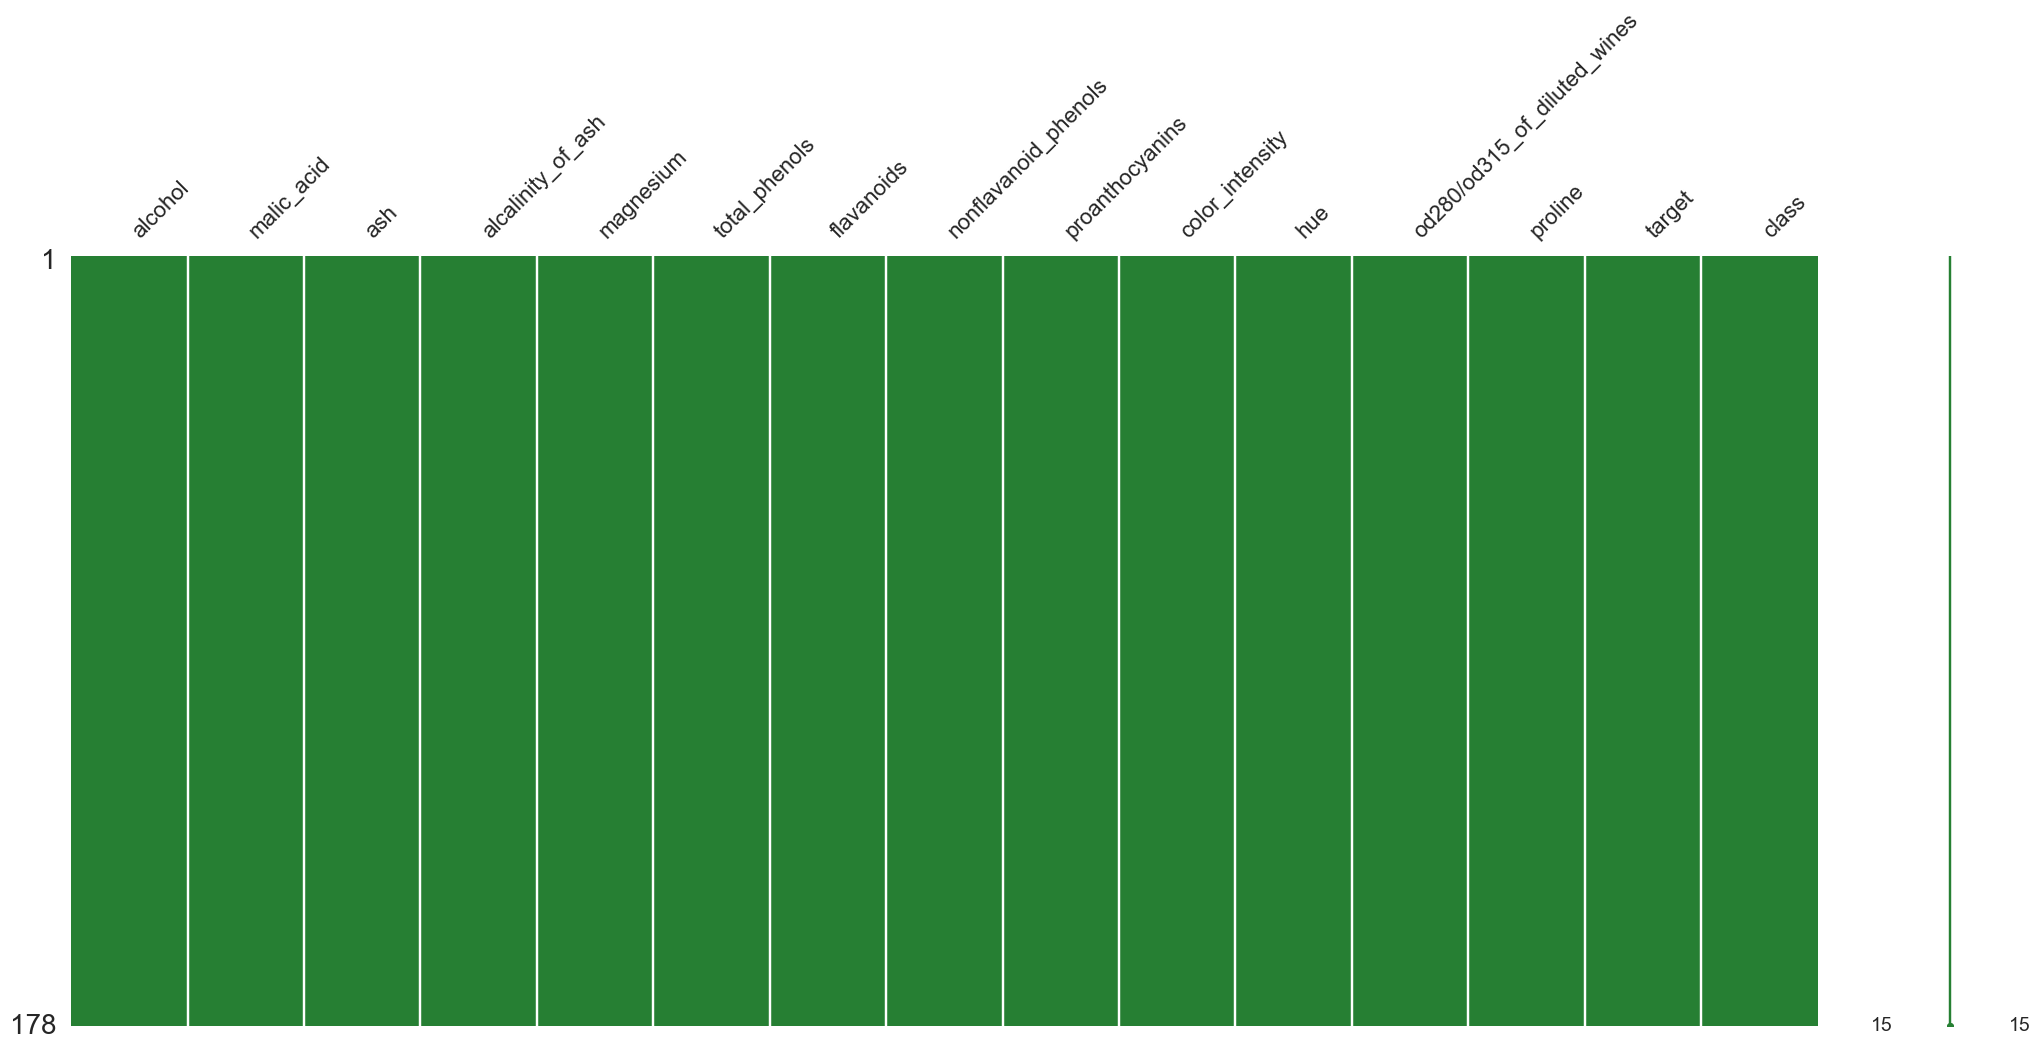

In [21]:
mns.matrix(wine, color=(0.15, 0.5, 0.2))

### Observations

* there are no missing data
* there are 15 variables only one is categorical and the rest are numeric

In [24]:
wine['class'].value_counts()

class_1    71
class_0    59
class_2    48
Name: class, dtype: int64

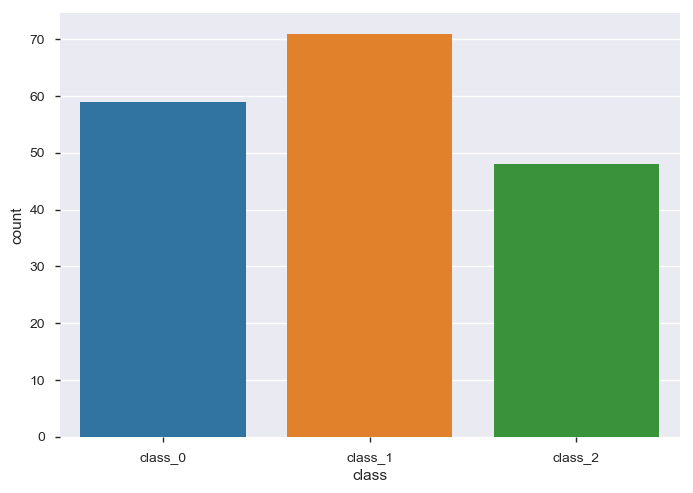

In [26]:
sns.countplot(wine['class'], data=wine)

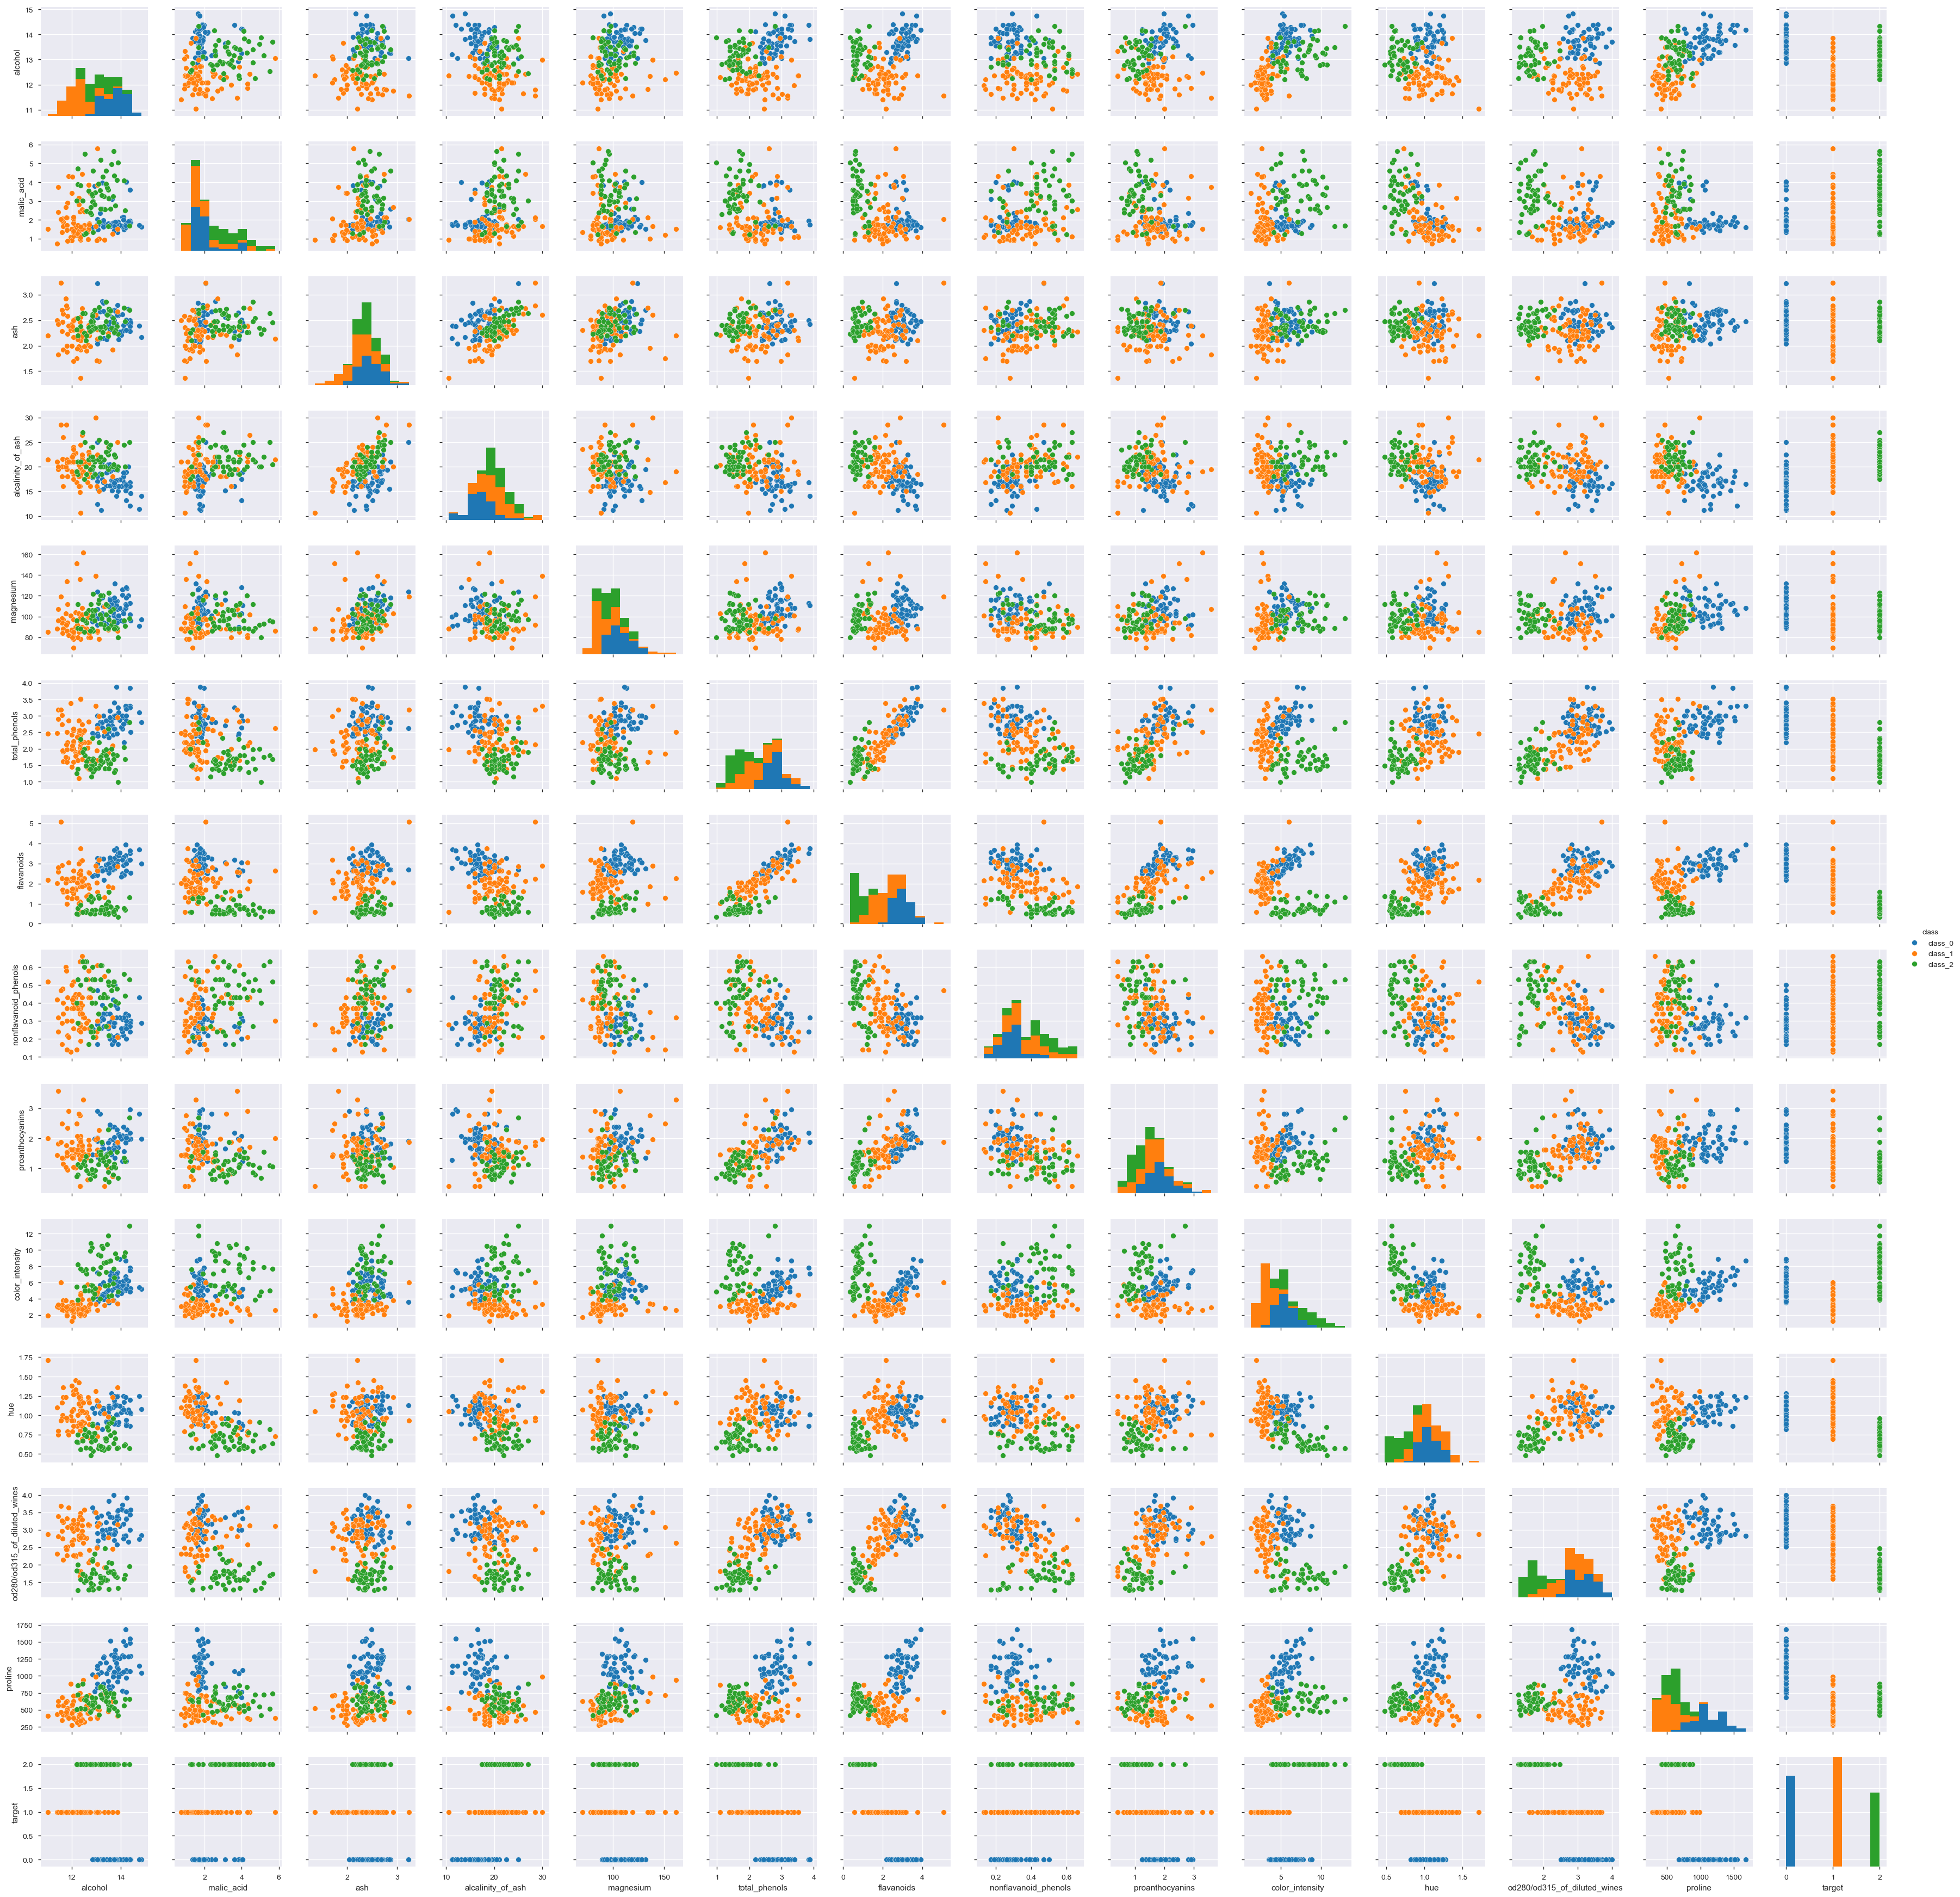

In [29]:
sns.pairplot(data=wine, hue='class')

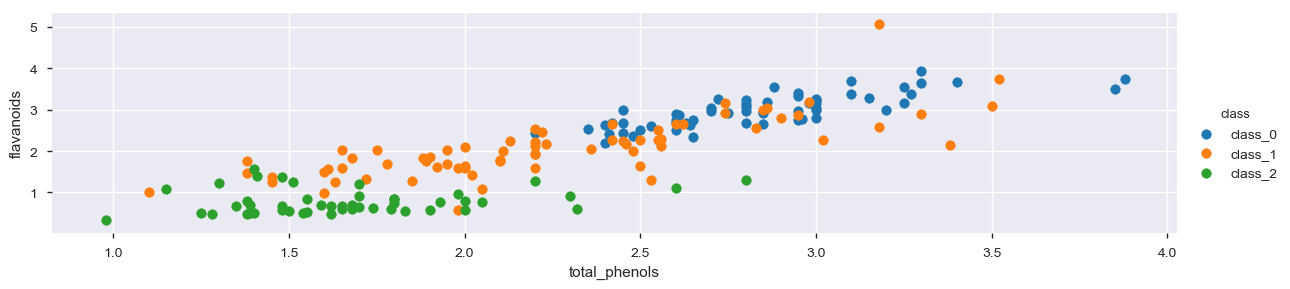

In [49]:
sns.FacetGrid(wine, hue='class', aspect=4)\
.map(plt.scatter, 'total_phenols','flavanoids' )\
.add_legend()

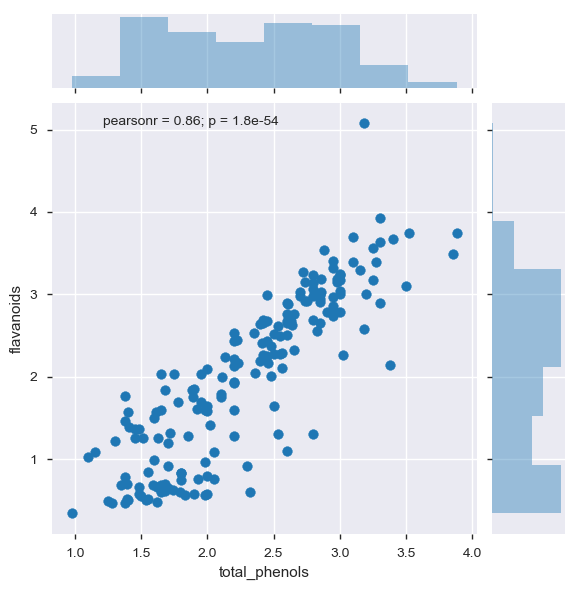

In [55]:
sns.jointplot(x='total_phenols',y='flavanoids', data=wine)

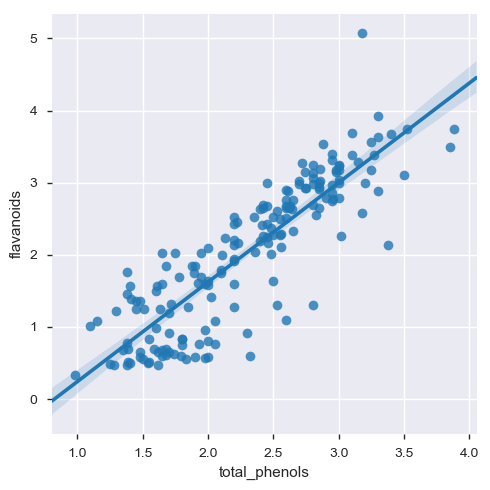

In [60]:
sns.lmplot(x='total_phenols',y='flavanoids', data=wine,  fit_reg=True)

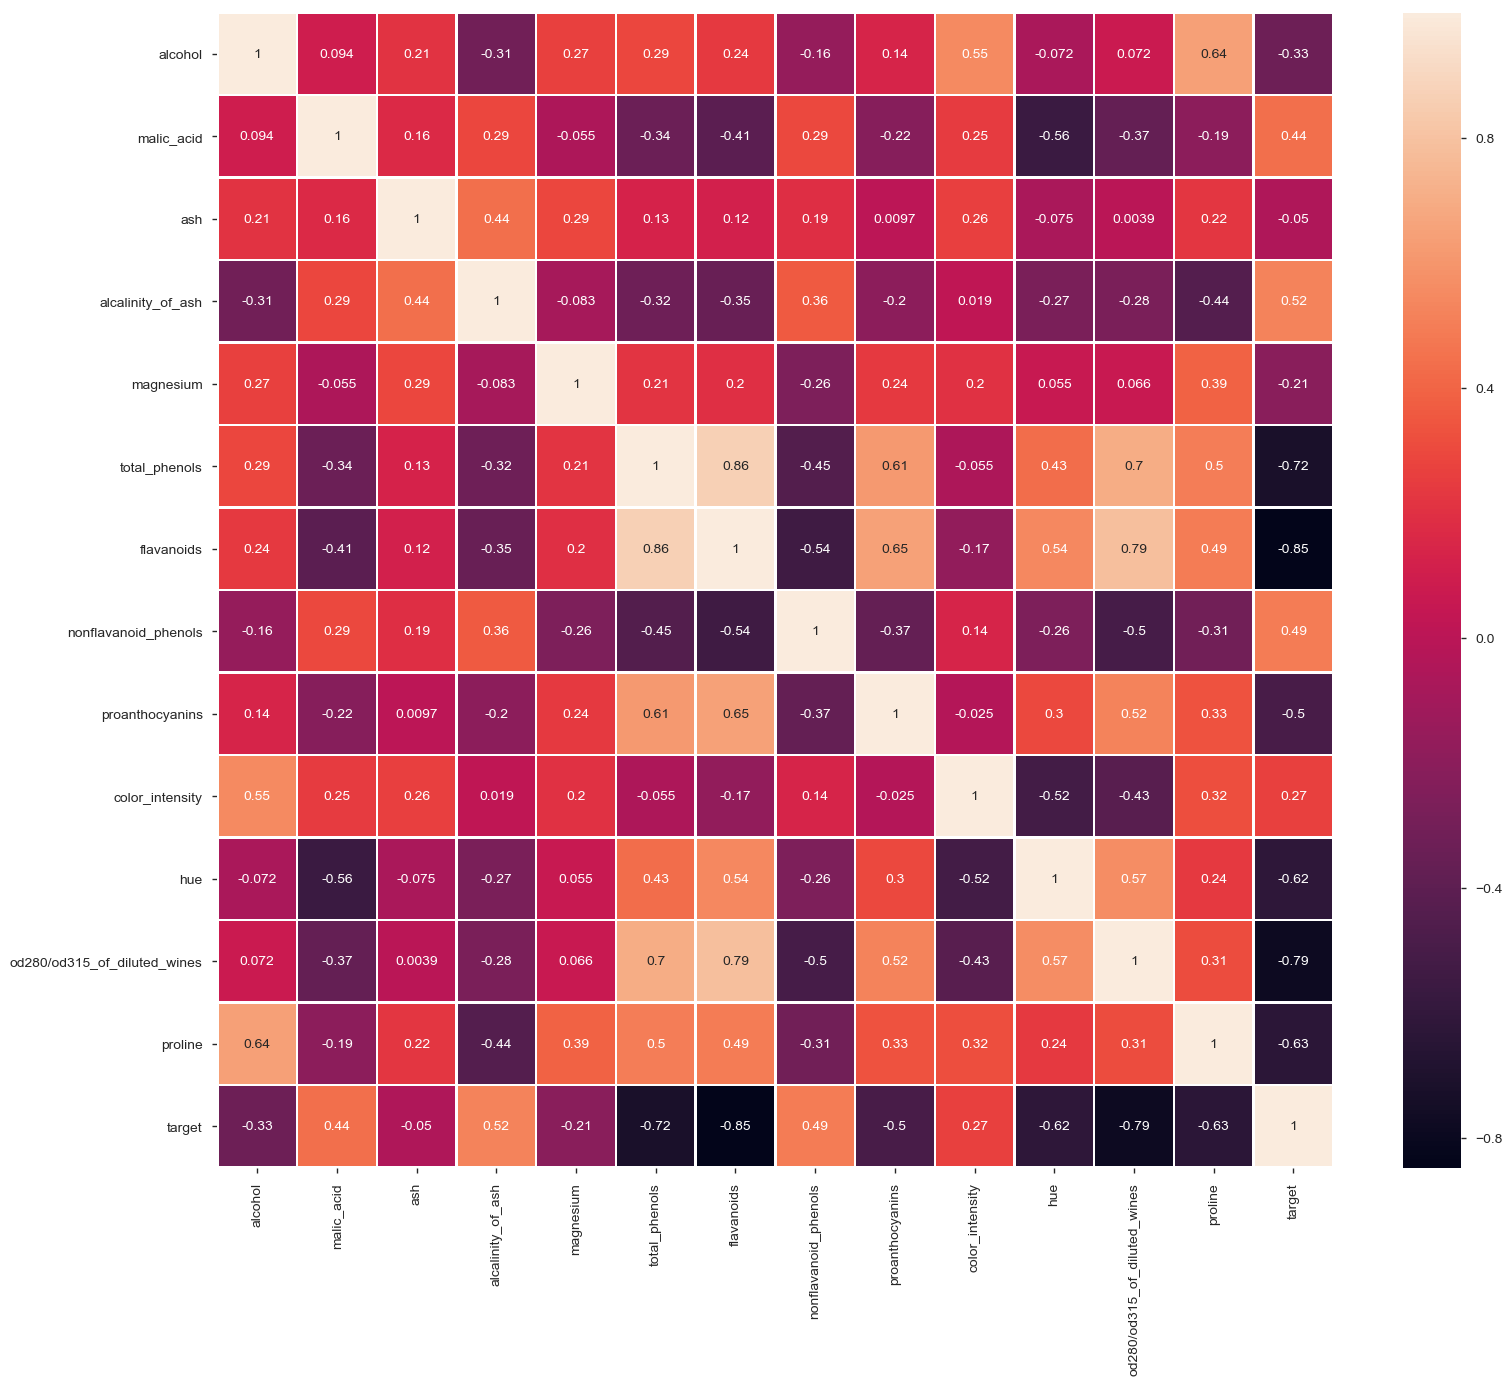

In [34]:
plt.figure(figsize=(18,15))
sns.heatmap(data=wine.corr(), linewidths=1, annot=True)

In [38]:
correlation = wine.corr()['target'].drop('target')
print(correlation.sort_values(kind='quicksort', ascending=False))

alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64


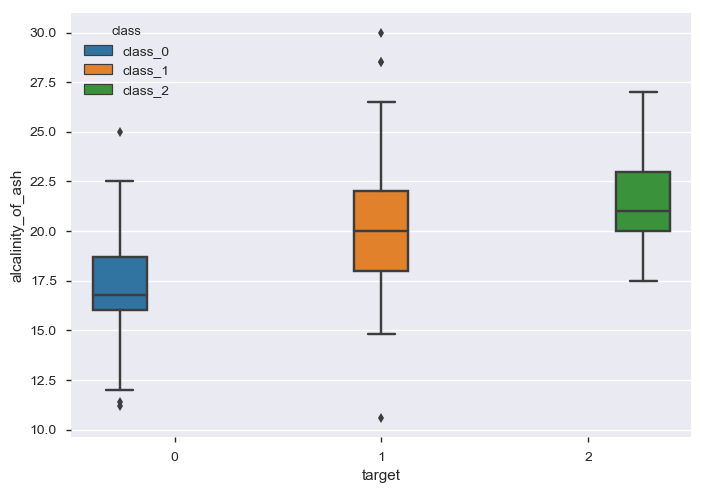

In [39]:
sns.boxplot(x='target', y='alcalinity_of_ash', data=wine, hue='class')

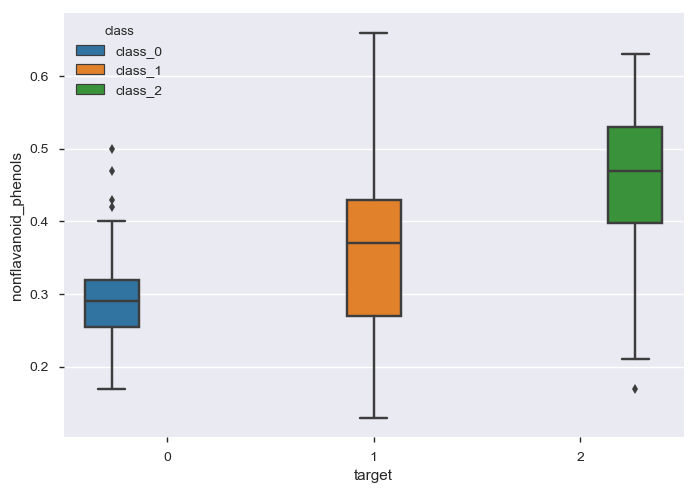

In [40]:
sns.boxplot(x='target', y='nonflavanoid_phenols', data=wine, hue='class')